In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('data/Tamil_movies_dataset.csv')

In [5]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['PeopleVote'] = pd.to_numeric(df['PeopleVote'], errors='coerce')


In [6]:
df.dropna(subset=['Rating', 'PeopleVote'], inplace=True)

In [7]:
C = df['Rating'].mean()
m = df['PeopleVote'].quantile(0.6)

In [8]:
df['Weighted_Average'] = ((df['Rating'] * df['PeopleVote']) + (C * m)) / (df['PeopleVote'] + m)
df_weighted = df.sort_values(by='Weighted_Average', ascending=False)

C:\Users\sanja\AppData\Local\Temp\ipykernel_2316\578605738.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weighted_Average', y='MovieName', data=df_weighted.head(10), palette='viridis')


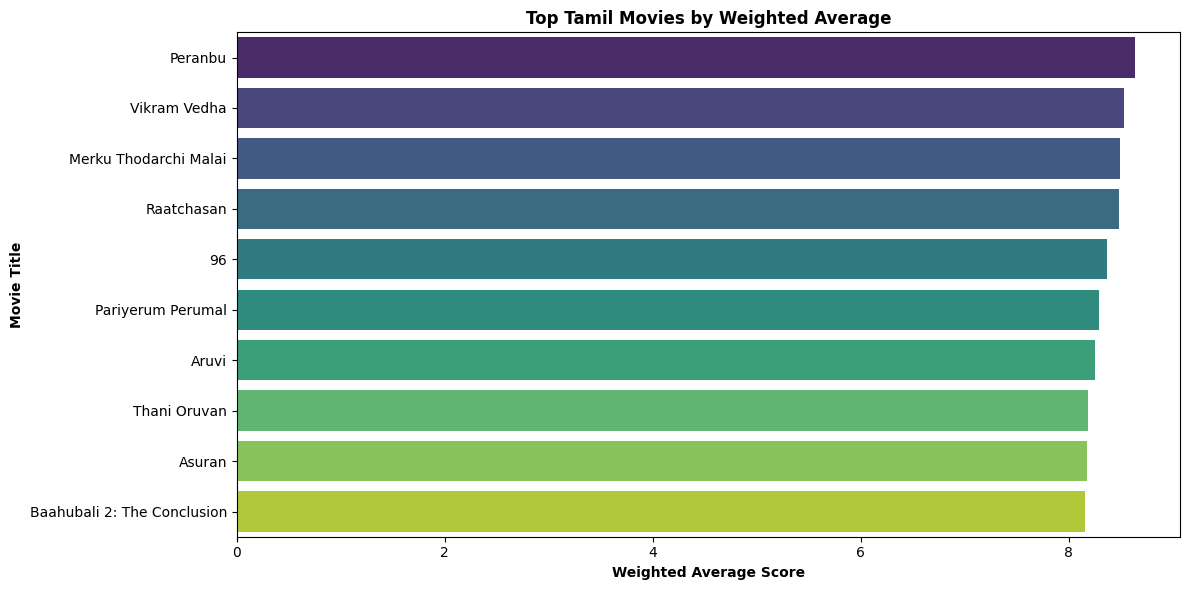

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Weighted_Average', y='MovieName', data=df_weighted.head(10), palette='viridis')
plt.title('Top Tamil Movies by Weighted Average', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.tight_layout()
plt.show()

In [12]:
scaler = MinMaxScaler()
df[['Norm_Rating', 'Norm_PeopleVote']] = scaler.fit_transform(df[['Rating', 'PeopleVote']])
df['Score'] = 0.5 * df['Norm_Rating'] + 0.5 * df['Norm_PeopleVote']
df_blended = df.sort_values(by='Score', ascending=False)

C:\Users\sanja\AppData\Local\Temp\ipykernel_2316\3326564216.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='MovieName', data=df_blended.head(10), palette='flare')


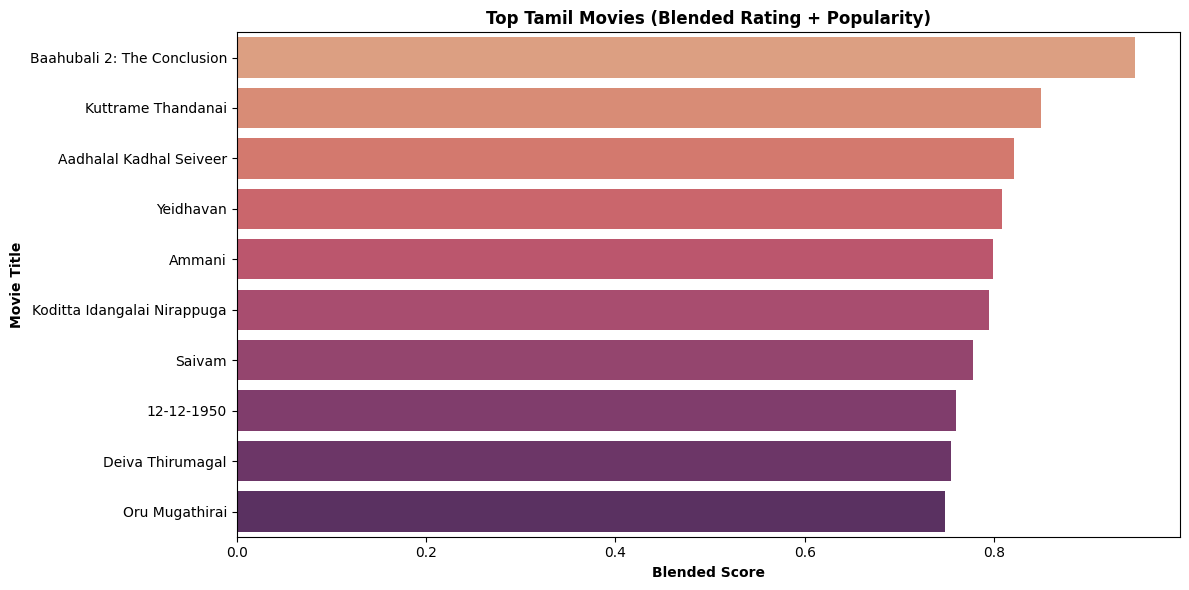

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Score', y='MovieName', data=df_blended.head(10), palette='flare')
plt.title('Top Tamil Movies (Blended Rating + Popularity)', weight='bold')
plt.xlabel('Blended Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.tight_layout()
plt.show()